## Install prerequisite deps for model archiving

In [1]:
!pip install -q -U torch-model-archiver diffusers accelerate transformers sentencepiece


[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


## Pull the SD model from Huggingface & save locally

In [2]:
import torch
from diffusers import StableDiffusion3Pipeline

# HuggingFace token & model tile acceptance required: https://huggingface.co/stabilityai/stable-diffusion-3-medium-diffusers
hf_token = "[YOUR-TOKEN-HERE]"

pipeline = StableDiffusion3Pipeline.from_pretrained(
    "stabilityai/stable-diffusion-3-medium-diffusers",
    variant="fp16",
    torch_dtype=torch.float16,
    token=hf_token
)
pipeline.to("cuda")
pipeline.save_pretrained("./downloaded_model")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/706 [00:00<?, ?B/s]

Fetching 26 files:   0%|          | 0/26 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/247M [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

text_encoder_3/config.json:   0%|          | 0.00/740 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16-00002-of-00002.safetensors:   0%|          | 0.00/4.53G [00:00<?, ?B/s]

model.fp16-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)oder_3/model.safetensors.index.fp16.json:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/576 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

tokenizer_3/special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer_3/tokenizer_config.json:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

transformer/config.json:   0%|          | 0.00/372 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/739 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/4.17G [00:00<?, ?B/s]

tokenizer_3/tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


  0%|          | 0/50 [00:00<?, ?it/s]

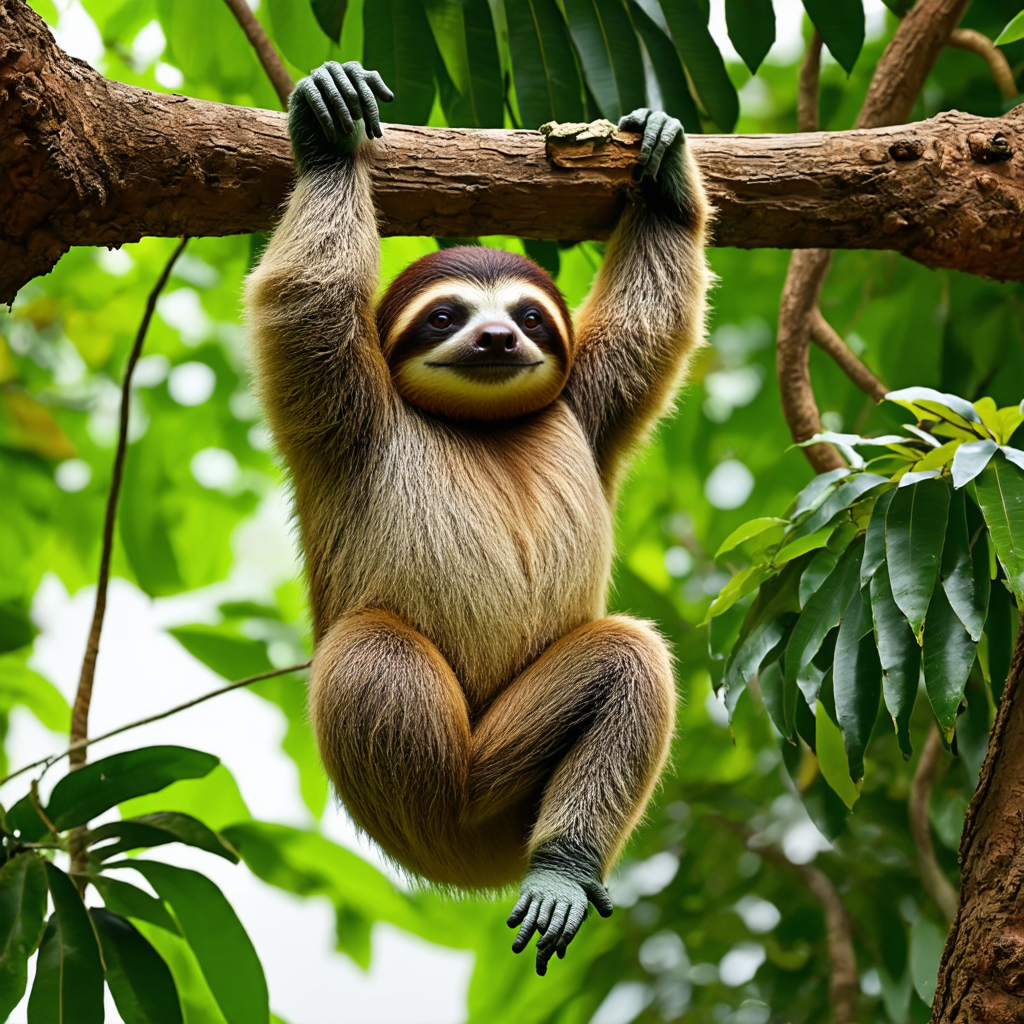

In [12]:
image = pipeline(
    "A realistic photo of a sloth hanging from a tree branch in the jungle.",
    negative_prompt="",
    num_inference_steps=50,
    guidance_scale=7.0,
).images[0]
image

## Zip the downloaded model (files must be in root dir of zip file)

In [7]:
%cd downloaded_model
!zip -FSr ../model.zip *
%cd ../

/opt/app-root/lib64/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/opt/app-root/src/SDXL-TRAIN/sd3/downloaded_model
  adding: model_index.json (deflated 64%)
  adding: scheduler/ (stored 0%)
  adding: scheduler/scheduler_config.json (deflated 35%)
  adding: text_encoder/ (stored 0%)
  adding: text_encoder/config.json (deflated 44%)
  adding: text_encoder/model.safetensors (deflated 8%)
  adding: text_encoder_2/ (stored 0%)
  adding: text_encoder_2/config.json (deflated 44%)
  adding: text_encoder_2/model.safetensors (deflated 8%)
  adding: text_encoder_3/ (stored 0%)
  adding: text_encoder_3/model-00002-of-00003.safetensors (deflated 33%)
  adding: text_encoder_3/model-00003-of-00003.safetensors (deflated 36%)
  adding: text_encoder_3/config.json (deflated 46%)
  adding: text_encoder_3/model.safetensors.index.json (deflated 95%)
  adding: text_encoder_3/model-00001-of-00003.safetensors (deflated 33%)
  adding: tokenizer/ (stored 0%)
  adding: tokenizer/special_tokens_map.json (deflated 78%)
  adding: tokenizer/merges.txt (deflated 60%)
  adding: toke

##  Archive the saved model, incl. custom handler that'll utilize the zip from model storage to seed HF diffuser pipelines

In [9]:
!torch-model-archiver --model-name stable-diffusion \
    --version 1.0 \
    --handler stable_diffusion_handler.py \
    --extra-files model.zip \
    --requirements-file ./requirements.txt \
    --force #replace if already exists

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


WARNING - Overwriting /opt/app-root/src/SDXL-TRAIN/sd3/stable-diffusion.mar ...
